# Signalverarbeitung - Praktikum 4

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.hrz.tu-chemnitz.de%2Fjs68viga--tu-freiberg.de%2Fsignalverarbeitung-ss23/HEAD?labpath=%2FP-4%2FSigProc_Praktikum04.ipynb)

Herzlich willkommen zum vierten Praktikum der Lehrveranstaltung "Signalverarbeitung" im Sommersemester 2023!

In diesem Praktikum geht es um die Anwendung der Kreuzkorrelation für die Signalanalyse. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal


# Einleitung

Bei messtechnischen Anwendungen besteht häufig die Aufgabe, den zeitlichen Abstand zwischen zwei Signalen zu bestimmen. Ein Beispiel ist die Messung der Dicke eines Bauteils mittels Ultraschall. Hierbei wird ein Ultraschallimpuls senkrecht zur Oberfläche in das Bauteil gesendet und die an der Rückwand reflektierten Wellen werden als Echo empfangen. Die zeitliche Differenz zwischen gesendetem und empfangenem Signal entspricht der Laufzeit der Schallwelle durch das Bauteil. Aus der Laufzeit lässt sich (bei bekannter Schallgeschwindigkeit) die Dicke des Bauteils ermitteln. Weitere Erläuterung zu dem Messverfahren finden sich z.B. [hier](https://wiki.tum.de/display/zfp/Schichtdickenmessung+mit+Ultraschall).

# Aufgabe
Für eine Ultraschallmessung im Puls-Echo-Verfahren soll die Zeit zwischen gesendetem und empfangenem (reflektiertem) Signal bestimmt werden. Die unten gezeigte Messung ist gegeben. Zu Beginn ist das gesendete Signal zu sehen, mit einem zeitlichen Verzug ist das reflektierte Signal zu sehen. Die Abtastrate beträgt 1 MHz.

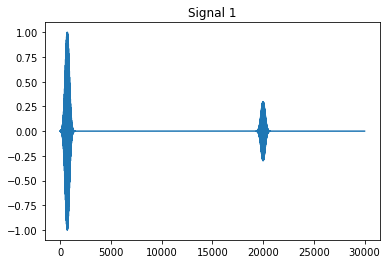

In [2]:
s1 = np.genfromtxt("signal_1.csv")
plt.plot(s1)
plt.title("Signal 1")
plt.show()


a) Bestimmen Sie die Laufzeit des reflektierten Signals mittels Peak-Detection (vgl. Praktikum 1).

b) Wenden Sie folgende Methoden zur Vorverarbeitung des Signals an und führen Sie anschließend die Peak-Detection durch um die Laufzeit zu ermitteln:
- Berechnung der Hüllkurve mittels Hilbert-Transformation, vgl. [`scipy.signal.hilbert()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html).
- Kreuzkorrelation des Signals mit dem gesendeten Signal, vgl. [`numpy.correlate()`]().
- Kreuzkorrelation des Signals mit dem gesendeten Signal und anschließende Berechnung der Hüllkurve.

c) Bei dem gegebenen Signal handelt es sich um ein ideales, synthetisches Signal. In der Praxis sind Messsignale meist mit Störungen, wie z.B. Rauschen überlagert. Im Folgenden sollen die Methoden aus a) und b) hinsichtlich ihrer Robustheit gegenüber Rauschen charakterisiert werden. Führen Sie hierfür die folgenden Teilschritte durch:
- Erzeugen Sie ein Störsignal bestehend aus einem zufälligen [weißen Rauschen](https://de.wikipedia.org/wiki/Wei%C3%9Fes_Rauschen) mit einer Standardabweichung von 0.1 (vgl. [`numpy.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) und überlagern Sie das Messsignal mit diesem Störsignal
- Bestimmen Sie aus dem verrauschten Signal die Laufzeit nach den Methoden aus a) und b)
- Wiederholen Sie die Bestimmung für mehrere Realisierungen des Rauschens
- Variieren Sie das Signal-Rausch-Verhältnis und vergleichen Sie die Ergebnisse der Messungen für die verschiedenen Methoden. 
- Diskutieren Sie die Ergebnisse. Welche Methoden eignen sich für die Analyse der verrauschten Signale? 

d) *Zusatzaufgabe:* Definieren Sie eine Kennzahl zur Chrakterisierung des Signal-Rausch Verhältnisses (SNR). Stellen Sie den Einfluss des SNR auf die Genauigkeit der Messung grafisch dar. Bis zu welchem SNR zeigen die jeweiligen Methoden gute Ergebnisse?